## Checking mchirp for horizon

Simple approximation is that chirp mass can be used to scale the range/horizon of a source at low masses, as $$h \propto \mathcal{M}^{5/6}.$$
Want to check to what mass that is accurate for different detectors

In [1]:
import numpy as np
import pylab as plt

import configurations
from simple_pe.detectors import interpolate_horizon

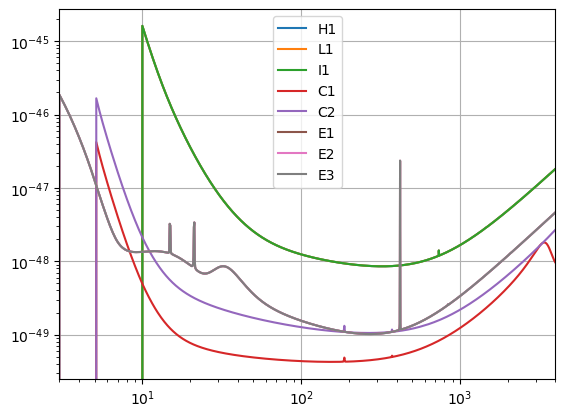

In [2]:
for i, p in configurations.psds.items():
    plt.loglog(p.sample_frequencies, p, label=i)
plt.grid()
plt.xlim(3, 4000)
plt.legend()

In [3]:
min_mass = 1.
max_mass = 1000.
q = 1.0
spin = 0.
snr = 8.

In [4]:
horizon = {}

In [5]:
for i, p in configurations.psds.items():
    horizon[i] = interpolate_horizon(min_mass, max_mass, q, spin, p, configurations.fmins[i], snr)

In [6]:
masses = np.linspace(min_mass, max_mass, 100)

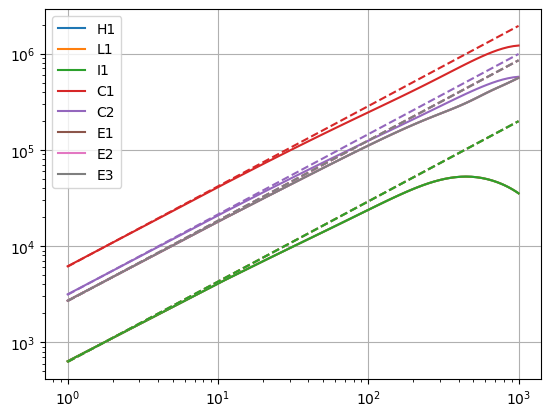

In [7]:
for i, h in horizon.items():
    plt.loglog(masses, h(masses), label=i)
plt.gca().set_prop_cycle(None)
for i, h in horizon.items():
    plt.loglog(masses, h(2.8) * (masses/2.8)**(5./6), '--')
plt.grid()
plt.legend()